# Ecuaciones Diferenciales 
## Proyecto Bono
Matias Cadena - 201920779

Universidad de los Andes — Mayo 27, 2022.
___
## Problema

El siguiente sistema puede representar de forma muy simplificada una pelota que rebota contra el piso. Se denota por $x(t)$ a la posición vertical de la pelota y con $v(t)$ la velocidad (positiva hacia arriba). Cuando $x(t)>0$ quiere decir que la pelota está en el aire y por lo tanto satisface la ecuación

$$
  m\dot{v} = -b_av - mg
$$

donde $m$ es la masa de la pelota y $b_a$ el coeficiente de rozamiento del aire. Ahora, cuando $x(t)≤0$ la pelota está en contacto con el piso y se modela como un sistema masa-resorte, es decir

$$
  m\dot{v} = -kx - bv - mg
$$

con $k$, $b$ constantes que dependen de la elasticidad del piso. El modelo anterior se puede plantear como un sistema lineal a trozos y si bien no se puede calcular la solución analítica en forma exacta, es posible calcular tramos de la solución.

Considere los parámetros $b_a =0,1$, $m= 1$, $b= 30$, $g= 9,8$, $k$ igual a los primeros seis dígitos de su código dividido 2 ($201920/2 = 100960$) y las condiciones iniciales $x(0) = 10$ y $v(0) = 0$.

___
### Planteamiento de sistema

#### Cuando $x(t)>0$

$$
  m\dot{v} = -b_av - mg
$$
$$
  \dot{v} + \frac{b_a}{m}v = -g
$$
$$
  \dot{v} + \frac{0.1}{1}v = -9.8 \\ u(t)=e^{\int_ \ \frac{1}{10}dt} = e^{\frac{1}{10}t}
$$
$$
  \frac{d}{dx} (ve^{\frac{1}{10}t}) = -9.8e^{\frac{1}{10}t}
$$
$$
  \int_ \ \frac{d}{dt} (ve^{\frac{1}{10}t}) dt = \int_ \ -9.8e^{\frac{1}{10}t} dt
$$
$$
  ve^{\frac{1}{10}t} = -98e^{\frac{1}{10}t} + C
$$
$$
v(t) = -98 + Ce^{\frac{-1}{10}t}
$$

Si $v(0) = 0$ entonces $C = 98$

$$
v(t) = -98 + 98e^{\frac{-1}{10}t}
$$

Para encontrar la posición toca integrar $v(t)$

$$
\int_ \ v(t)dt = \int_ \ -98 + 98e^{\frac{-1}{10}t} dt
$$
$$
x(t) = -98t - 980e^{\frac{-1}{10}t} + C
$$

Si $x(0) = 10$ entonces $C = 990$

$$
x(t) = -98t - 980e^{\frac{-1}{10}t} + 990
$$

Cual es la velocidad cuando $x(t) = 0$ y cual es el valor de $t$

$$
x(t) = -98t - 980e^{\frac{-1}{10}t} + 990 = 0 \hspace{0.5cm} \rightarrow \hspace{0.5cm} t = 1.46
$$
$$
v(1.46) = -98 + 98e^{\frac{-1*1.46}{10}} = -13.3 m/s
$$

#### Cuando $x(t) \leq 0$

$$
  m\dot{v} = -kx - bv - mg
$$
$$
  m\dot{v} + bv + kx = - mg
$$
$$
  \ddot{x} + \frac{b}{m}\dot{x} + \frac{k}{m}x = - g
$$
$$
  \ddot{x} + \frac{30}{1}\dot{x} + \frac{100960}{1}x = - 9.8
$$

Se supone que x=e^{rt}

$$
  r^2 + 30r + 100960 \hspace{0.5cm} \rightarrow \hspace{0.5cm} r=\frac{-30±\sqrt{900 - 403840}}{2}
$$
$$
  x(t) = C_1e^{-15t}cos(\sqrt{100735}t)+C_2e^{-15t}cos(\sqrt{100735}t)
$$

Si $X(t) = A$, 

$$
\frac{100960}{1}A = - 9.8 \hspace{0.5cm} \rightarrow \hspace{0.5cm} A = -9.7*10^{-5}
$$
$$
x(t) = C_1e^{-15t}cos(\sqrt{100735}t)+C_2e^{-15t}sin(\sqrt{100735}t) - 9.7*10^{-5}
$$

Si $x(1.46) = 0$ y $v(t) = -13.3$ entonces

$$
x(t) = -67074792e^{-15t}cos(\sqrt{100735}t)-126321983e^{-15t}sin(\sqrt{100735}t) - 9.7*10^{-5}
$$

Vuelve a ser cero cuando $t = 1.47$ y la velocidad es

$$
\frac{d}{dt}(x(t)) = \frac{d}{dt}(-67074792e^{-15t}cos(\sqrt{100735}t)-126321983e^{-15t}sin(\sqrt{100735}t) - 9.7*10^{-5}))
$$
$$
v(t) = 1006121884e^{-15t}cos(\sqrt{100735}t)+21288719100e^{-15t}sin(\sqrt{100735}t)-1894829747e^{-15t}sin(\sqrt{100735}t)-40093053170e^{-15t}cos(\sqrt{100735}t)
$$
$$
v(t) = -39086931300e^{-15t}cos(\sqrt{100735}t)+19393889350sin(\sqrt{100735}t)
$$
$$
v(1.47) = 11 m/s
$$

El proceso se repite para encontrar las siguientes soluciones

___
### Codigo y gráficas 

In [2]:
using Pkg
Pkg.activate(pwd())
Pkg.instantiate()
Pkg.add("OrdinaryDiffEq")

  Activating project at `~/Documents/GitHub/Matias_Cadena`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/Documents/GitHub/Matias_Cadena/Project.toml`
  No Changes to `~/Documents/GitHub/Matias_Cadena/Manifest.toml`


In [3]:
using DifferentialEquations
using Plots

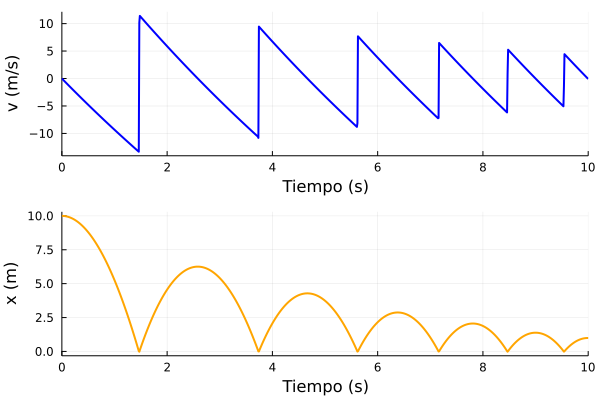

In [5]:
#Definir el problema
function f!(du,u,p,t)
        if u>0
                ddu = -bₐ/m*du - g
        else
                ddu = -k/m*u -b/m*du - g
        end

        if isapprox(u, 0)
                du0 = du
                u0 = u
        end
        return ddu
end


#Constantes
m = 1.0
bₐ = 0.1
g = 9.8
b = 30.0
k = 201920/2

#Parametros
du0 = 0.0
u0 = 10.0
tspan = (0.0, 10.0)
p = [bₐ, m, g, k]

prob = SecondOrderODEProblem(f!, du0, u0, tspan, p)

#Resolver el problema
sol = solve(prob)

plot(sol,
     linewidth=2,
     xlabel="Tiempo (s)",
     ylabel=["v (m/s)" "x (m)"],
     color=["blue" "orange"],
     legend=false,
     layout=(2,1))

In [6]:
du_sol = [u[1] for u in sol.u]
u_sol = [u[2] for u in sol.u]

# Chequear x(t₁) = 0
count = 1
for i in 1:length(u_sol)
    if isapprox(u_sol[i], 0; atol=0.01) == true
        println("X=0 se da en t($count)=$(round(sol.t[i]; digits=2)) seg. -> i = $(i)")
        count += 1
    end
end

X=0 se da en t(1)=1.46 seg. -> i = 12
X=0 se da en t(2)=1.47 seg. -> i = 17
X=0 se da en t(3)=3.74 seg. -> i = 32
X=0 se da en t(4)=5.61 seg. -> i = 44
X=0 se da en t(5)=5.62 seg. -> i = 48
X=0 se da en t(6)=7.16 seg. -> i = 61
X=0 se da en t(7)=7.17 seg. -> i = 66
X=0 se da en t(8)=8.47 seg. -> i = 79
X=0 se da en t(9)=8.47 seg. -> i = 80
X=0 se da en t(10)=9.53 seg. -> i = 87
X=0 se da en t(11)=9.54 seg. -> i = 88
X=0 se da en t(12)=9.54 seg. -> i = 91
X=0 se da en t(13)=9.55 seg. -> i = 92


___
### Discución y Conclusiones

El comportamiento de la pelota se puede modelar con dos funciones una por la ley de newton y otro como masa resorte. Para poder resolver este comportamiento se resolvio la pimera ecuacion como primer orden y luego se saco la integral para encontrara la posición. La segunda ecuación se resolvio una de segundo orden. Los resultados que se obtenian en el primer punto se usaban para poder resolver la segunda. En general como se puede observar en las gráficas anteriores la pelota va disminuyendo su rebote debido al rosamiento que siente con el aire y cuando se deforma en el piso. Por lo cual con el tiempo la altura va diminuyendo acercandose a cero.